检测自适应程序是否有效，即结果是否收敛。

**方法**
- 绘制相干性比例变化曲线
  - 观察相干性比例在实验过程中的变化趋势
- 变异系数变化曲线
  - 量化相干性比例的波动程度，判断是否趋于稳定
  - 步骤
    - 将实验分为多个阶段（如每 50个试次 为一个阶段）。
    - 计算每个阶段的相干性比例的 均值 和 标准差。
    - 计算变异系数（Coefficient of Variation, CV = 标准差/均值）
    - 观察变异系数是否随实验进程逐渐减小
- 自适应程序的收敛性分析
  - 计算每个被试在实验后期的平均相干性比例（如最后 50个试次）
  - 较该值与心理测量函数拟合的 85% 和 65% 正确率对应的相干性比例

## 相干性比例变化曲线

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "../3_2_pilot_expt_v3/output/df_new.csv"

# 使用 read_csv 函数读取CSV文件，指定分隔符为空格
df = pd.read_csv(path, sep=' ')

df

,Participant_ID,judge_type,difficulty,coherence,target_color_proportion,trial_num
0,1,color,easy_formal,0.0,0.80000,1
1,1,color,easy_formal,0.0,0.80000,2
2,1,color,easy_formal,0.0,0.80000,3
3,1,color,easy_formal,0.0,0.80000,4
4,1,color,easy_formal,0.0,0.80000,5
...,...,...,...,...,...,...
4779,5,color,hard_formal,0.0,0.53625,233
4780,5,color,hard_formal,0.0,0.53625,234
4781,5,color,hard_formal,0.0,0.53625,235
4782,5,color,hard_formal,0.0,0.53625,236


In [12]:
# 滑动窗口大小
window_size = 24

# 创建一个空的'rolling_mean'列
df['rolling_mean'] = None

# 按照'Participant_ID'和'judge_type'分组
groups = df.groupby(['Participant_ID', 'judge_type'])

for name, group in groups:
    if name[1] == 'motion':  # 运动条件
        # 计算滑动平均并赋值给'rolling_mean'列
        df.loc[(df['Participant_ID'] == name[0]) & (df['judge_type'] == name[1]), 'rolling_mean'] = \
            group['coherence'].rolling(window=window_size, min_periods=1).mean()
    elif name[1] == 'color':  # 颜色条件
        df.loc[(df['Participant_ID'] == name[0]) & (df['judge_type'] == name[1]), 'rolling_mean'] = \
            group['target_color_proportion'].rolling(window=window_size, min_periods=1).mean()

df

,Participant_ID,judge_type,difficulty,coherence,target_color_proportion,trial_num,rolling_mean
0,1,color,easy_formal,0.0,0.80000,1,0.8
1,1,color,easy_formal,0.0,0.80000,2,0.8
2,1,color,easy_formal,0.0,0.80000,3,0.8
3,1,color,easy_formal,0.0,0.80000,4,0.8
4,1,color,easy_formal,0.0,0.80000,5,0.8
...,...,...,...,...,...,...,...
4779,5,color,hard_formal,0.0,0.53625,233,0.537083
4780,5,color,hard_formal,0.0,0.53625,234,0.536875
4781,5,color,hard_formal,0.0,0.53625,235,0.536667
4782,5,color,hard_formal,0.0,0.53625,236,0.536458


分面绘制

还要分不同难度水平，每个被试单独绘制

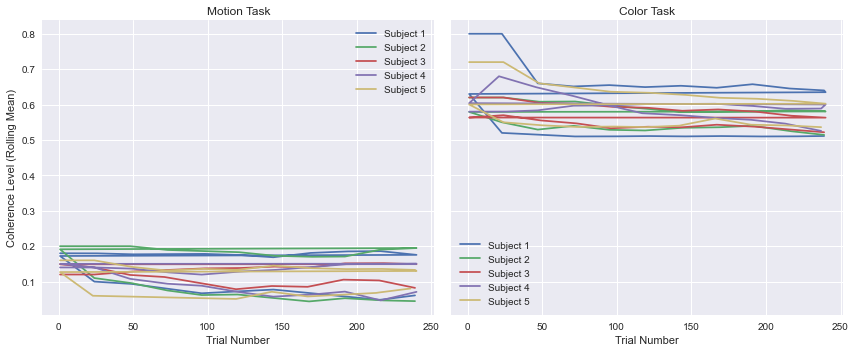

In [13]:
# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# 绘制运动任务
motion_data = df[df['judge_type'] == 'motion']
for subject_id, subject_data in motion_data.groupby('Participant_ID'):
    axes[0].plot(subject_data['trial_num'], subject_data['rolling_mean'],
                 label=f'Subject {subject_id}')
axes[0].set_xlabel('Trial Number')
axes[0].set_ylabel('Coherence Level (Rolling Mean)')
axes[0].set_title('Motion Task')
axes[0].legend()

# 绘制颜色任务
color_data = df[df['judge_type'] == 'color']
for subject_id, subject_data in color_data.groupby('Participant_ID'):
    axes[1].plot(subject_data['trial_num'], subject_data['rolling_mean'],
                 label=f'Subject {subject_id}')
axes[1].set_xlabel('Trial Number')
axes[1].set_title('Color Task')
axes[1].legend()

plt.tight_layout()
plt.show()

## 变异系数变化曲线

In [ ]:
# 将实验分为多个阶段
num_stages = 4  # 分为4个阶段
data['stage'] = pd.cut(data['trial_number'], bins=num_stages, labels=np.arange(1, num_stages + 1))

# 计算每个阶段的变异系数
cv_data = data.groupby(['subject_id', 'stage'])['coherence_level'].agg(
    mean='mean',
    std='std'
).reset_index()
cv_data['cv'] = cv_data['std'] / cv_data['mean']

# 绘制变异系数变化曲线
for subject_id, subject_data in cv_data.groupby('subject_id'):
    plt.plot(subject_data['stage'], subject_data['cv'], label=f'Subject {subject_id}')

plt.xlabel('Stage')
plt.ylabel('Coefficient of Variation (CV)')
plt.title('Coherence Level Stability')
plt.legend()
plt.show()

## 程序的收敛性分析

这里可以考虑做个 *t* 检验

In [ ]:
# 计算实验后期的平均相干性比例
late_stage_data = data[data['trial_number'] > 50].groupby('subject_id')['coherence_level'].mean()

# 假设目标相干性比例为 0.3 和 0.5
target_coherence = {'85%': 0.5, '65%': 0.3}

# 比较实验后期均值与目标值
for subject_id, mean_coherence in late_stage_data.items():
    print(f'Subject {subject_id}: Late-stage mean coherence = {mean_coherence:.3f}')
    for target_name, target_value in target_coherence.items():
        print(f'  Difference from {target_name} target: {abs(mean_coherence - target_value):.3f}')